In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import gender_guesser.detector as gender
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/golden-globe-awards/golden_globe_awards.csv


In order for the module gender-guesser to work, one must install the module using Kaggle's console with internet option switched on and type "!pip install gender-guesser". Only then you can import gender_guesser.detector as gender code.

In [3]:
gd = gender.Detector()
df = pd.read_csv(r"/kaggle/input/golden-globe-awards/golden_globe_awards.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


In [5]:
genders = []
for i in df.category:
    if "actor" in i.lower():
        genders.append("male")
    elif "actress" in i.lower():
        genders.append("female")
    else:
        genders.append("null")
df['genders'] = genders
df.head()

,year_film,year_award,ceremony,category,nominee,film,win,genders
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True,female
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True,male
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True,null
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True,null
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True,female


Added new column to justify if nominees are male or female by using keywords such as "Actor" or "Actress" from category, those that did not mention will be justify "null" for now. The next is justify "null" to male or female using gender-guesser module.

In [6]:
df.genders.value_counts()

null      3545
female    2233
male      2213
Name: genders, dtype: int64

In [7]:
nm = df.nominee.str.split()
firstname = []
for i in range(len(nm)):
    firstname.append(nm[i][0])

This is to point out the first name of all nominees, nominees with movie title only will later justified as unknown using gender-guesser module.

In [8]:
guess = []
for i in range(len(firstname)):
    guess.append(gd.get_gender(firstname[i]))    # assign gender from all the first name into guess's list.
    
for i in range(len(df)):
    if "null" in df.genders[i]:
        df.genders[i] = df.genders[i].replace("null", guess[i])    # replace the nulls from df.genders to the assigned guess's list.
        
df.genders.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


male             3387
female           2452
unknown          1813
mostly_female     204
mostly_male        76
andy               59
Name: genders, dtype: int64

from previous df.genders, the output was:

* null      3545
* female    2233
* male      2213


After going through the gender-guesser function, the new df.genders output is:

* male             3387
* female           2452
* unknown          1813
* mostly_female     204
* mostly_male        76
* andy               59

(andy means androgynous, and unknown are mostly due to gender-guesser read the title of the movie instead of celebrity first name)

In [9]:
df.genders = df.genders.replace("mostly_female", "female")
df.genders = df.genders.replace("mostly_male", "male")

Lastly, turns all the mostly_female/male to female and male to sums up the male and female counts, assuming they are mostly male and female names.

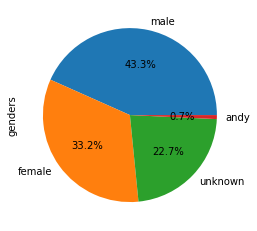

In [10]:
df.genders.value_counts().plot.pie(autopct='%1.1f%%')

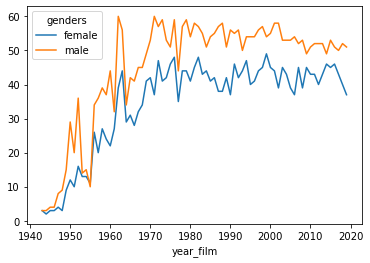

In [11]:
year = year = df[(df.genders == 'male')| (df.genders == 'female')]
year = year.groupby('year_film').genders.value_counts()
year.unstack().plot.line()

the "year" value is created to count numbers of nominated male and female nominees from year 1943 to 2019. The plot is shown above. The "andy" and "unknown" category is taken off for clear picture understanding.

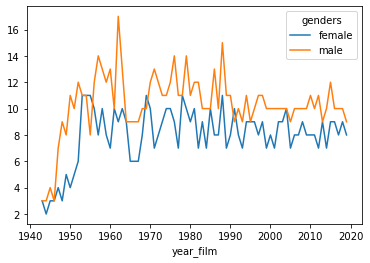

In [12]:
win = df[(df.genders == 'male')| (df.genders == 'female')]
win = win[win.win == True]
win = win.groupby('year_film').genders.value_counts()
win.unstack().plot.line()


the "win" value is determine the award winner for both male and female nominess from 1943 to 2019. The "andy" and "unknown" category is taken off for clear picture understanding.